# Kings County Housing Prices Bakeoff


## Read in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as stats
import math
import folium
import geopandas as gpd

pd.set_option('display.max_columns', 50, 'display.max_rows', 200)

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [3]:
# df = pd.read_csv("kc_house_data_train.csv")
city_df = pd.read_csv("with_cities.csv")
# print(df.shape)
print(city_df.shape)
city_df.head()

(17290, 25)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geom,county,city
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,"47.4388,-122.162",King County,Fairwood
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,"47.6784,-122.285",King County,Seattle
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,"47.5646,-122.129",King County,Bellevue
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,"47.6995,-122.228",King County,Kirkland
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,"47.6647,-122.083",King County,Redmond


In [4]:
city_df.sample(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geom,county,city
9402,9402,4112100165,20150317T000000,475000.0,3,3.00,2010,2554,2.0,0,0,3,7,1860,150,2001,0,98118,47.5525,-122.269,1370,5100,"47.5525,-122.269",King County,Seattle
16701,16701,6204420180,20140603T000000,425000.0,3,2.25,1870,9000,1.0,0,0,3,7,1440,430,1978,0,98011,47.7373,-122.198,1870,8640,"47.7373,-122.198",King County,Bothell
4093,4093,8001450170,20140804T000000,274950.0,3,1.75,1840,16679,1.0,0,0,3,8,1840,0,1989,0,98001,47.3207,-122.275,1910,15571,"47.3207,-122.275",King County,Lakeland North
15333,15333,7338200170,20150422T000000,600000.0,4,2.50,2710,35009,2.0,0,2,3,9,2710,0,1992,0,98045,47.4815,-121.714,2330,35040,"47.4815,-121.714",King County,Riverpoint
6746,6746,6437400101,20141113T000000,284000.0,2,1.00,860,7204,1.0,0,0,3,7,860,0,1918,0,98106,47.5361,-122.351,1200,7500,"47.5361,-122.351",King County,Seattle
12818,12818,5036300431,20150311T000000,1099880.0,5,2.75,3520,6353,2.0,0,0,4,10,3520,0,2001,0,98199,47.6506,-122.391,2520,6250,"47.6506,-122.391",King County,Seattle
7242,7242,8856890330,20140915T000000,300000.0,4,2.25,1740,9613,2.0,0,0,5,8,1740,0,1989,0,98058,47.4630,-122.125,1680,9769,"47.463,-122.125",King County,Renton
15229,15229,7853301220,20140910T000000,425000.0,4,2.50,2440,5088,2.0,0,0,3,7,2440,0,2007,0,98065,47.5406,-121.889,2440,5762,"47.5406,-121.889",King County,Snoqualmie
4197,4197,3304300080,20150330T000000,588000.0,4,2.50,3060,7710,2.0,0,0,3,9,3060,0,2009,0,98059,47.4828,-122.136,3040,7840,"47.4828,-122.136",King County,Renton
5751,5751,546000045,20150325T000000,422500.0,2,1.00,800,4046,1.0,0,0,3,7,800,0,1940,0,98117,47.6895,-122.382,1400,4046,"47.6895,-122.382",King County,Seattle


In [5]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [6]:
#Drop first column from DataFrame
city_df.drop('Unnamed: 0', axis=1, inplace=True)


In [7]:
#Take a look at descriptive statistics
city_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [8]:
city_df.groupby('waterfront')['price'].mean()

waterfront
0    5.315051e+05
1    1.688486e+06
Name: price, dtype: float64

In [9]:
city_df.corr().loc['waterfront','price']

0.2757786708046838

In [10]:
print(city_df['bedrooms'].quantile(.999))
print(city_df['bedrooms'].quantile(.001))

8.0
1.0


In [68]:
city_df.groupby('zipcode')['price'].median().sort_values(ascending=True)

zipcode
98002     229950.0
98168     235000.0
98032     248000.0
98001     261000.0
98003     265000.0
98188     265000.0
98198     266875.0
98023     268250.0
98148     278000.0
98178     279000.0
98022     279000.0
98030     283200.0
98031     289950.0
98042     292500.0
98055     296725.0
98106     312000.0
98092     312750.0
98146     313500.0
98058     332000.0
98038     342000.0
98108     346500.0
98010     362500.0
98118     365500.0
98133     375000.0
98155     377225.0
98056     380000.0
98045     390000.0
98126     394500.0
98019     406250.0
98166     410000.0
98014     410500.0
98125     425000.0
98059     430000.0
98034     447450.0
98028     448500.0
98070     467500.0
98011     470000.0
98144     475000.0
98024     475000.0
98065     499900.0
98072     505000.0
98136     510000.0
98107     529975.0
98177     532550.0
98117     535610.0
98007     542250.0
98008     550000.0
98103     560000.0
98027     560000.0
98115     561500.0
98116     568000.0
98122     575000.0
9802

In [69]:
city_df.groupby('zipcode')['price'].median().sort_values(ascending=True).values


array([ 229950.,  235000.,  248000.,  261000.,  265000.,  265000.,
        266875.,  268250.,  278000.,  279000.,  279000.,  283200.,
        289950.,  292500.,  296725.,  312000.,  312750.,  313500.,
        332000.,  342000.,  346500.,  362500.,  365500.,  375000.,
        377225.,  380000.,  390000.,  394500.,  406250.,  410000.,
        410500.,  425000.,  430000.,  447450.,  448500.,  467500.,
        470000.,  475000.,  475000.,  499900.,  505000.,  510000.,
        529975.,  532550.,  535610.,  542250.,  550000.,  560000.,
        560000.,  561500.,  568000.,  575000.,  587500.,  615000.,
        634900.,  645000.,  652475.,  675000.,  679500.,  687500.,
        736000.,  737444.,  745000.,  750000.,  753000.,  761225.,
        940000.,  989900., 1208000., 1892500.])

## Data Visualizations

This scatterplot helped me view the general spread of housing locations represented in the dataset and helped to determine if there were any outliers regarding geospacial location.

In [66]:
nb = '/Users/sandrawelbeck/Desktop/Flatiron_DS_Bootcamp/nyc-mhtn-ds-102620-lectures/Phase_2/Phase2_project/tl_2019_53033_faces/tl_2019_53033_faces.shp'
regions = gpd.read_file(nb)

regions.ZCTA5CE10 = pd.to_numeric(regions.ZCTA5CE10, errors='coerce')

regions["zipcode"] = regions["ZCTA5CE10"] 
plotprice = city_df.groupby("zipcode").price.mean()

regions2 = regions.join(plotprice, on='zipcode', how='left')

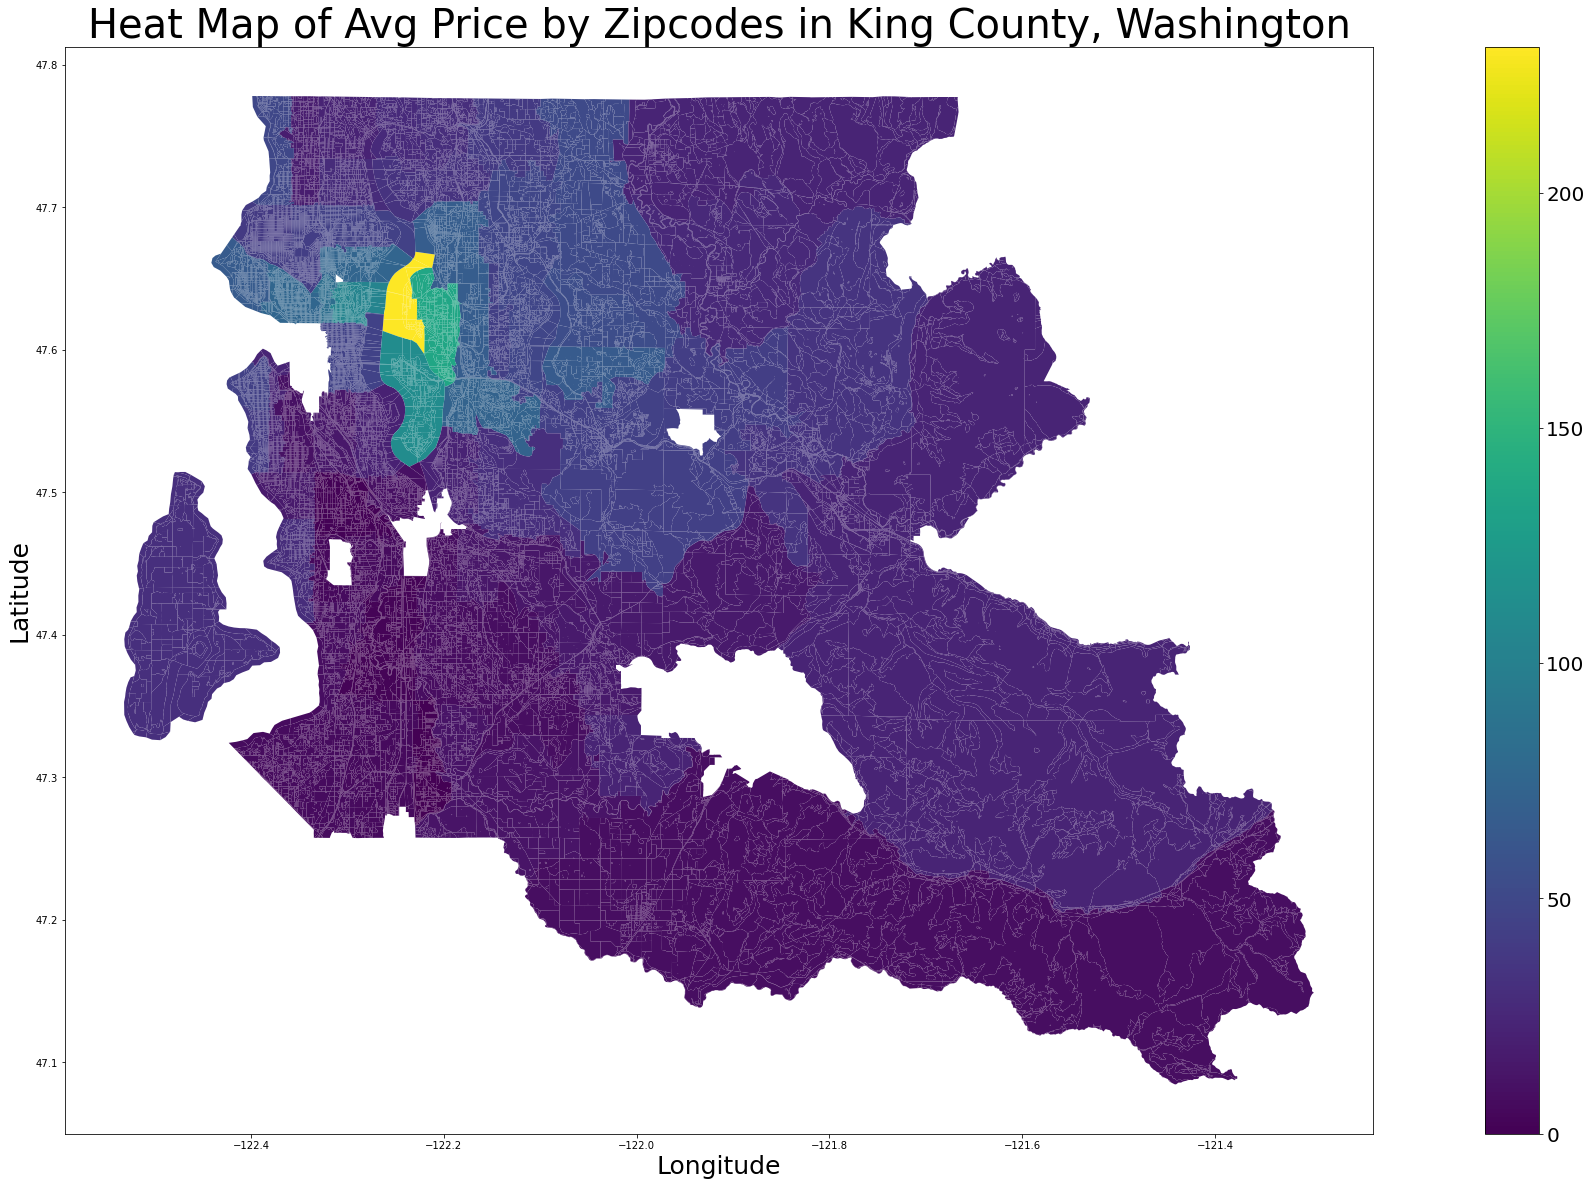

In [63]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
import descartes
import libpysal 
import mapclassify

fig, ax = plt.subplots(1, figsize=(40, 20))
# ax.axis('off')
ax.set_title('Heat Map of Avg Price by Zipcodes in King County, Washington', fontdict={'fontsize': '40', 'fontweight' : '3'})
ax.set_xlabel('Longitude', fontsize = '25')
ax.set_ylabel('Latitude', fontsize = '25')


vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

regions2.plot('price',ax=ax,figsize=(40,20))
plt.show()

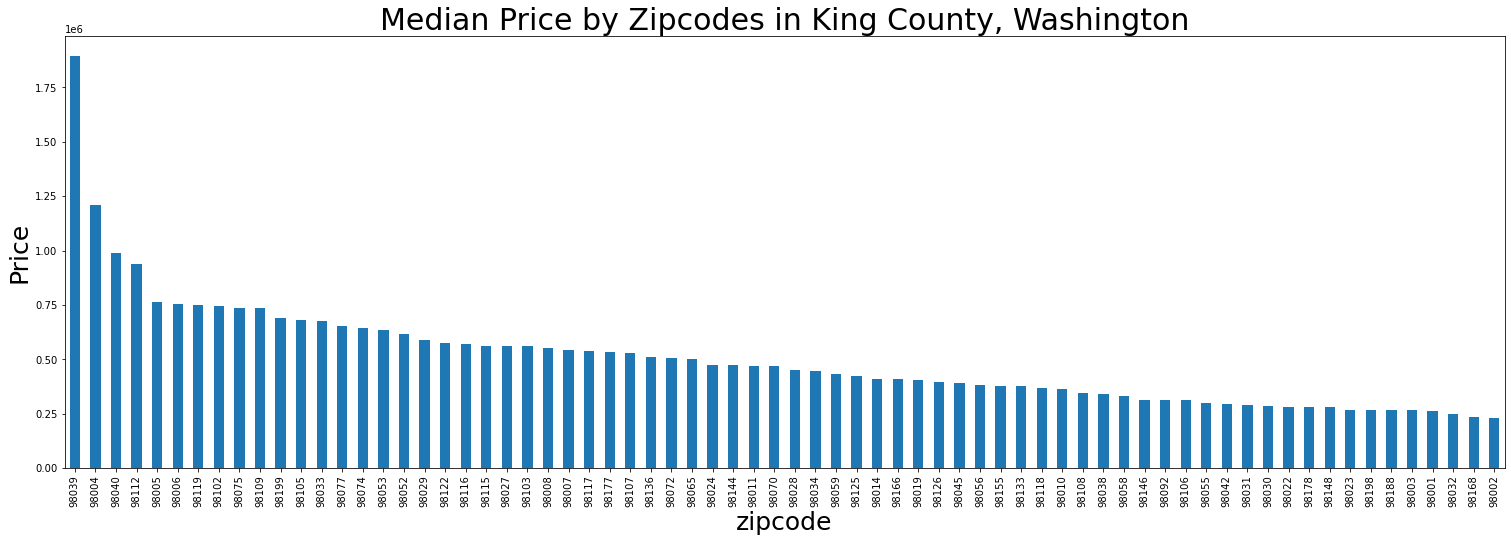

In [88]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
city_price = city_df.groupby('zipcode')['price'].median().sort_values(ascending=False)

ax.set_title('Median Price by Zipcodes in King County, Washington', fontdict={'fontsize': '30', 'fontweight' : '3'})
ax.set_xlabel('Zipcode', fontsize = '25')
ax.set_ylabel('Price', fontsize = '25')

x = city_df['zipcode']
y = city_df['price']

city_price.plot(kind='bar')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

plt.show()

Text(0.5, 0, 'Bathrooms')

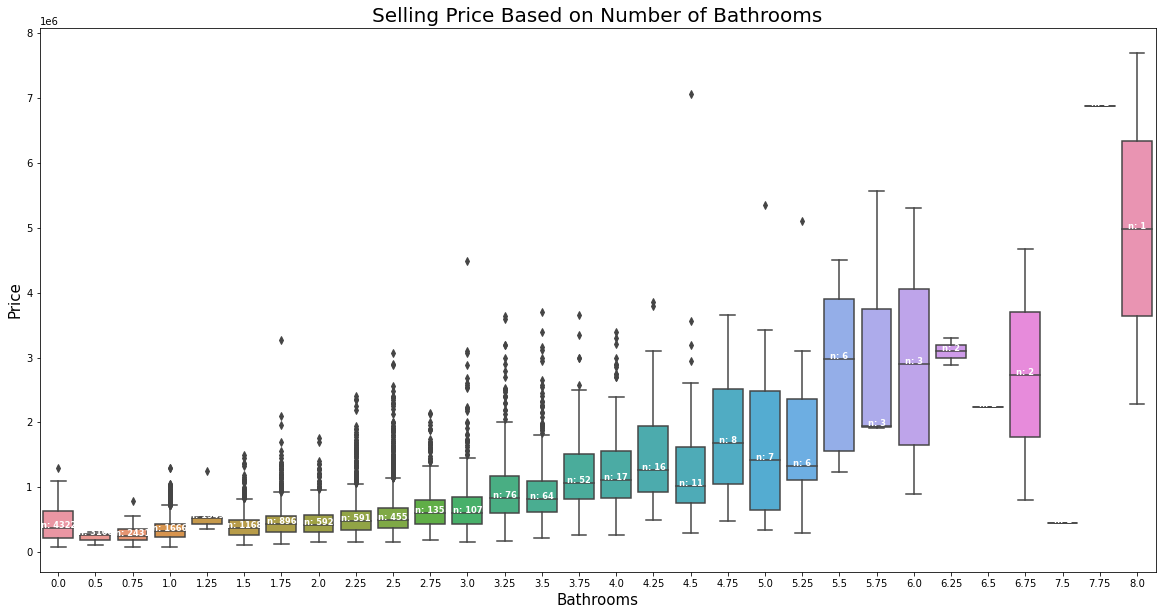

In [89]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=city_df['bathrooms'], y=city_df['price'], data=city_df)
# Calculate number of obs per group & median to position labels
medians = city_df.groupby(['bathrooms'])['price'].median().values
nobs = city_df['bathrooms'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
plt.title('Selling Price Based on Number of Bathrooms', size=20)
plt.ylabel('Price', size=15)
plt.xlabel('Bathrooms', size=15)

The boxplot below gives a sense of the distribution of the target data.

price
75000.0      AxesSubplot(0.125,0.125;0.775x0.755)
78000.0      AxesSubplot(0.125,0.125;0.775x0.755)
80000.0      AxesSubplot(0.125,0.125;0.775x0.755)
82000.0      AxesSubplot(0.125,0.125;0.775x0.755)
82500.0      AxesSubplot(0.125,0.125;0.775x0.755)
                             ...                 
5350000.0    AxesSubplot(0.125,0.125;0.775x0.755)
5570000.0    AxesSubplot(0.125,0.125;0.775x0.755)
6885000.0    AxesSubplot(0.125,0.125;0.775x0.755)
7062500.0    AxesSubplot(0.125,0.125;0.775x0.755)
7700000.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, Length: 3534, dtype: object

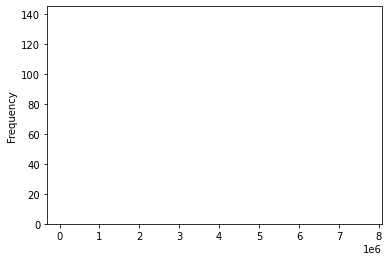

In [92]:
city_df.groupby('price')['price'].plot(kind='hist')

<AxesSubplot:xlabel='grade'>

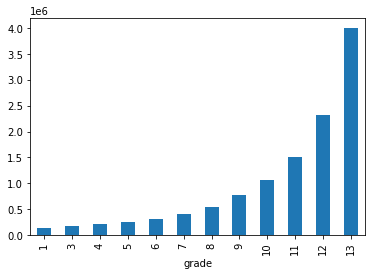

In [31]:
city_df.groupby('grade')['price'].mean().plot(kind='bar')


In [36]:
leave_out = ['id','date','month','year','price','geom']
for_plot = [x for x in city_df.columns if x not in leave_out]

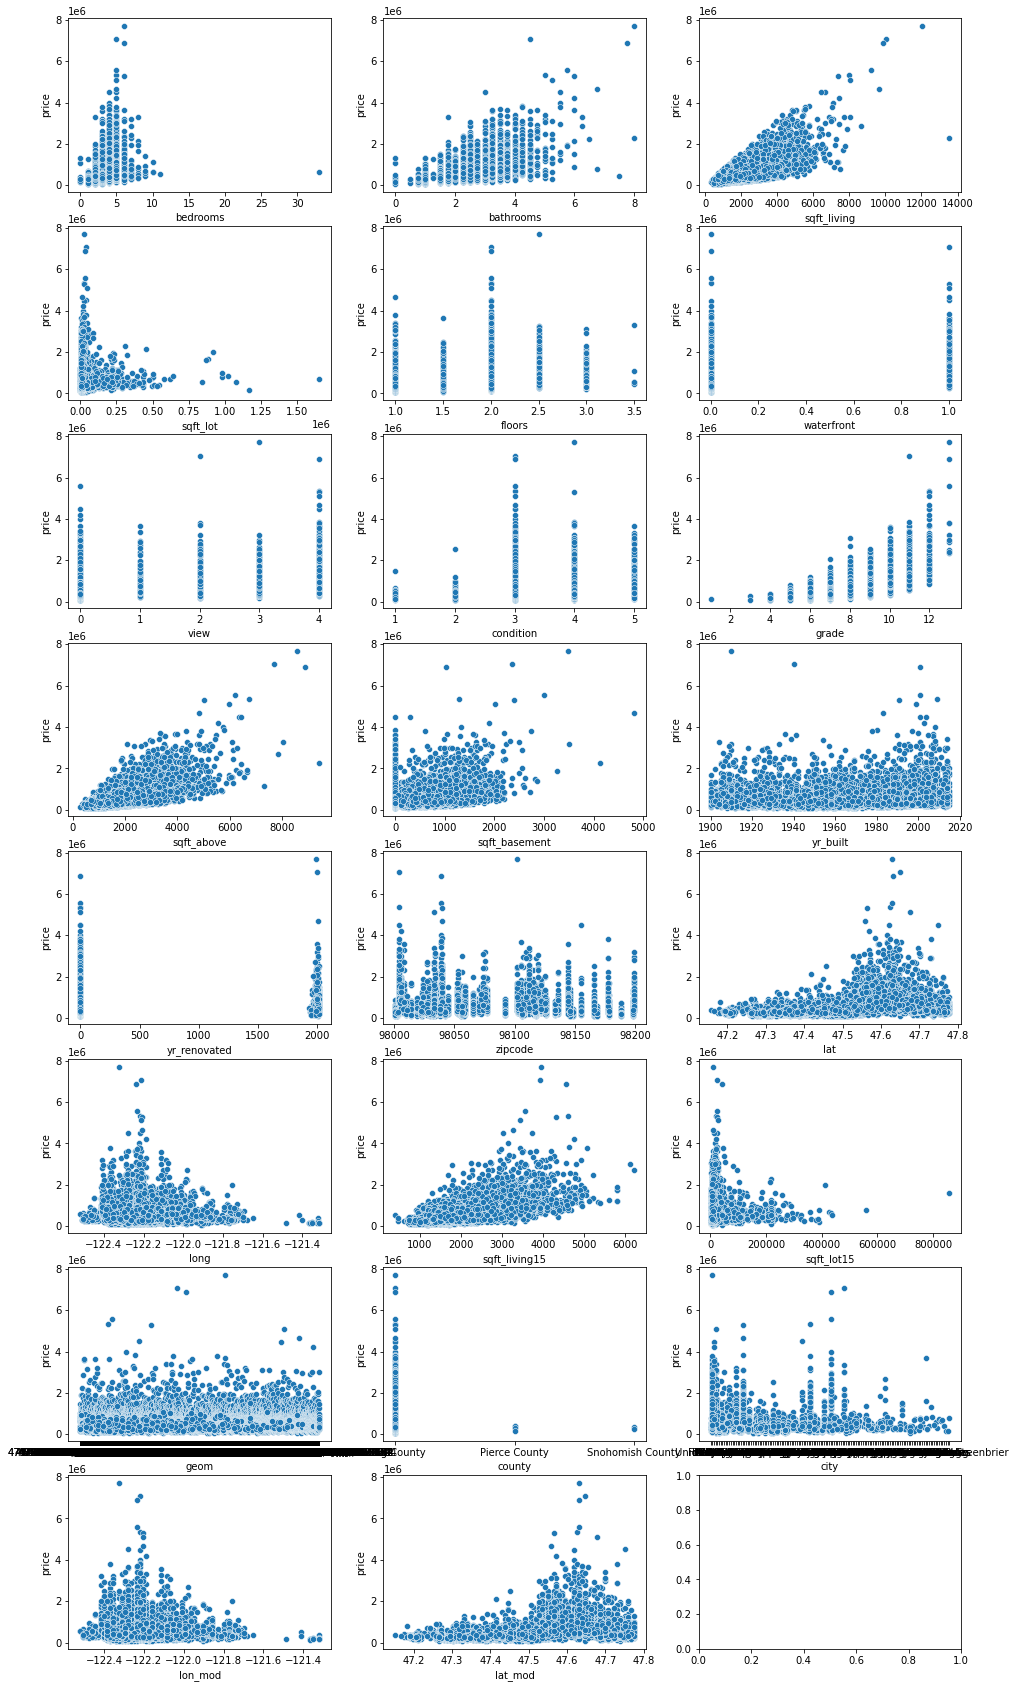

In [39]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(16,30))

for i, column in enumerate(for_plot):
    sns.scatterplot(data=city_df, x=column, y='price', ax=axes[i//3, i%3])

In [ ]:
# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(city_df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(city_df.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [ ]:
#Replace 33 bedrooms with 3 as it was a typo
city_df['bedrooms'] = city_df['bedrooms'].replace({33:3})

In [ ]:
#Create new yr_renovated column removing 0 values in yr_renovated column to an actual year(yr_built)
city_df['yr_renovated2'] = np.where(city_df['yr_renovated']==0, city_df['yr_built'], city_df['yr_renovated'])

In [ ]:
#Change date column to datetime type and create two additional columns for month and year sold
city_df['date'] = pd.to_datetime(city_df['date']) #turn date column to date type
city_df['month'] = pd.DatetimeIndex(city_df.loc[:,'date']).month #Create month column
city_df['year'] = pd.DatetimeIndex(city_df.loc[:,'date']).year #create year column

In [ ]:
city_df.corr().loc['sqft_living','sqft_living15']

In [ ]:
city_df.corr().loc['sqft_lot','sqft_lot15']

In [ ]:
city_df.corr().loc['sqft_living','price']

In [ ]:
city_df.corr(method='pearson')

## Feature Engineering

In [ ]:
city_df['property_age'] = 2020 - city_df['yr_built']

In [ ]:
city_df['yrs_since_reno'] = 2020 - city_df['yr_renovated2']

In [ ]:
city_df['yrs_btwn_built_reno'] = city_df['yr_renovated2'] - city_df['yr_built']

In [ ]:
city_df['property_age_when_sold'] = city_df['year'] - city_df['yr_built']

In [ ]:
city_df['has_basement'] = np.where(city_df['sqft_basement']==0, 0, 1)

In [ ]:
city_df['has_view'] = np.where(city_df['view']==0, 0, 1)

In [ ]:
city_df.groupby(['yr_built'])['price'].mean().sort_values(ascending=False)

In [ ]:
city_df['yr_built'].quantile(.9)

In [ ]:
city_df[city_df['yr_renovated2'] >= 2010]

In [ ]:
city_df['yr_renovated2'].describe()

In [ ]:
city_df['newly_built'] = np.where(city_df['yr_built']>=2010, 1, 0)

In [ ]:
city_df['charm'] = np.where((city_df['yr_built']<=1977) & (city_df['yr_renovated2']>=2010), 1, 0)

In [ ]:
city_df['grade_exp'] = np.exp(city_df['grade'])

In [ ]:
city_df.groupby('newly_built')['price'].mean()

In [ ]:
sns.barplot(data=city_df,x=city_df['newly_built'],y='price')

In [ ]:
city_df.charm.value_counts()

In [ ]:
city_df.groupby('charm')['price'].mean()

In [ ]:
sns.barplot(data=city_df,x=city_df['charm'],y='price')

In [ ]:
city_df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

In [ ]:
city_df.groupby('zipcode')['price'].mean().describe()

In [ ]:
city_df.groupby('zipcode')['price'].mean().quantile(.8)

In [ ]:
city_df.groupby('yrs_since_reno')['price'].mean().sort_values(ascending=False)
city_df.groupby('grade_exp')['price'].mean().sort_values(ascending=False)
city_df.groupby('has_basement')['price'].mean().sort_values(ascending=False)

## Statistical Tests

In [ ]:
city_df.groupby('charm')['price'].mean()

In [ ]:
ch1 = city_df.groupby('charm')['price'].get_group(0)
ch2 = city_df.groupby('charm')['price'].get_group(1)

### Two-Sample t-test to compare price of 'charm' to no charm

Null Hypothesis: The mean property values of homes with charm is equal to the mean property value of homes with no charm.

Alternative Hypothesis: The mean property values of homes with charm is not equal to the mean property value of homes with no charm.

In [ ]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
# calculate means
    mean1, mean2 = mean(data1), mean(data2)
# calculate standard errors
    se1, se2 = sem(data1), sem(data2)
# standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
# calculate the t statistic
    t_stat = (mean1 - mean2) / sed
# degrees of freedom
    degf = len(data1) + len(data2) - 2
# calculate the critical value
    cv = t.ppf(1.0 - alpha, degf)
# calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), degf)) * 2.0
# return everything
    return t_stat, degf, cv, p


# calculate the t test
alpha = 0.05
t_stat, degf, cv, p = independent_ttest(ch1, ch2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, degf, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [ ]:
print(np.var(ch1))
print(np.var(ch2))
print(np.var(ch2)/np.var(ch1))

In [ ]:
stats.ttest_ind(ch1, ch2, equal_var=False)

In [ ]:
new1 = city_df.groupby('newly_built')['price'].get_group(0)
new2 = city_df.groupby('newly_built')['price'].get_group(1)

### Two sample t-test to compare newly built and non-newly built homes

Null Hypothesis: The mean property value of newly built homes is equal to the mean property value of homes that are not newly built.

Alternative Hypothesis: The mean property value of newly built homes is not equal to the mean property value of homes that are not newly built.

In [ ]:
# calculate the t test
alpha = 0.05
t_stat, degf, cv, p = independent_ttest(new1, new2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, degf, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [ ]:
print(np.var(new1))
print(np.var(new2))
print(np.var(new2)/np.var(new1))

In [ ]:
stats.ttest_ind(new1, new2, equal_var=False)

In [ ]:
city_df.head()

In [ ]:
sns.scatterplot(data=city_df,x=city_df['property_age'],y='price')

In [ ]:
city_df.groupby('yrs_since_built')['price'].mean().sort_values(ascending=False)

In [ ]:
sns.scatterplot(data=city_df,x=city_df['yrs_since_built'],y='price')

In [ ]:
city_df['yrs_btwn_built_reno'].describe()

In [ ]:
leave_out = ['id','date','month','year','price','geometry','lat_long']
for_plot = [x for x in city_df.columns if x not in leave_out]

In [ ]:
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(16,30))

for i, column in enumerate(for_plot):
    sns.scatterplot(data=city_df, x=column, y='price', ax=axes[i//3, i%3])

### One Way ANOVA

Null Hypothesis: There are no significant differences in average home value between different cities in King County. 

Alternative Hypothesis: There is a significant difference in average home value between different cities in King County.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(city)', data=city_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

In [ ]:
import researchpy as rp

In [ ]:
city_df.price.describe()

In [ ]:
rp.summary_cont(city_df['price'])

In [ ]:
city_df.city

In [ ]:
rp.summary_cont(city_df['price'].groupby(city_df['city']))

In [ ]:
city_df.price.groupby(city_df['city']).median().sort_values(ascending=False)

In [ ]:
data1 = (city_df['price'][city_df['city'] == 'Medina'],
        city_df['price'][city_df['city'] == 'Clyde Hill'],
        city_df['price'][city_df['city'] == 'Yarrow Point'],
        city_df['price'][city_df['city'] == 'Hunts Point'],
        city_df['price'][city_df['city'] == 'Avondale'],
        city_df['price'][city_df['city'] == 'High Point'],
        city_df['price'][city_df['city'] == 'Beaux Arts Village'],
        city_df['price'][city_df['city'] == 'Mercer Island'],
        city_df['price'][city_df['city'] == 'Tibbetts Station'],
        city_df['price'][city_df['city'] == 'River Si Estates'],
        city_df['price'][city_df['city'] == 'Inglewood'],
        city_df['price'][city_df['city'] == 'Franklin'],
        city_df['price'][city_df['city'] == 'Cougar Hills'],
        city_df['price'][city_df['city'] == 'Earlmont'],
        city_df['price'][city_df['city'] == 'Coal Creek'],
        city_df['price'][city_df['city'] == 'South Firs'],
        city_df['price'][city_df['city'] == 'Sunridge at Elk Run'],
        city_df['price'][city_df['city'] == 'Bellevue'])

In [ ]:
stats.f_oneway(city_df['price'][city_df['city'] == 'Medina'],
               city_df['price'][city_df['city'] == 'Clyde Hill'],
               city_df['price'][city_df['city'] == 'Yarrow Point'],
               city_df['price'][city_df['city'] == 'Hunts Point'],
               city_df['price'][city_df['city'] == 'Avondale'],
               city_df['price'][city_df['city'] == 'High Point'],
               city_df['price'][city_df['city'] == 'Beaux Arts Village'],
               city_df['price'][city_df['city'] == 'Mercer Island'],
               city_df['price'][city_df['city'] == 'Tibbetts Station'],
               city_df['price'][city_df['city'] == 'River Si Estates'],
               city_df['price'][city_df['city'] == 'Inglewood'],
               city_df['price'][city_df['city'] == 'Franklin'],
               city_df['price'][city_df['city'] == 'Cougar Hills'],
               city_df['price'][city_df['city'] == 'Earlmont'],
               city_df['price'][city_df['city'] == 'Coal Creek'],
               city_df['price'][city_df['city'] == 'South Firs'],
               city_df['price'][city_df['city'] == 'Sunridge at Elk Run'],
               city_df['price'][city_df['city'] == 'Bellevue'])

In [ ]:
stats.f_oneway(city_df['price'][city_df['city'] == 'Medina'],
               city_df['price'][city_df['city'] == 'Clyde Hill'],
               city_df['price'][city_df['city'] == 'Yarrow Point'],
               city_df['price'][city_df['city'] == 'Hunts Point'],
               city_df['price'][city_df['city'] == 'Avondale'],
               city_df['price'][city_df['city'] == 'High Point'],
               city_df['price'][city_df['city'] == 'Beaux Arts Village'],
               city_df['price'][city_df['city'] == 'Mercer Island'],
               city_df['price'][city_df['city'] == 'Tibbetts Station'],
               city_df['price'][city_df['city'] == 'River Si Estates'])

In [ ]:
fig = plt.figure(figsize= (20, 20))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Price by City", fontsize= 20)
ax.set

data = [city_df['price'][city_df['city'] == 'Medina'],
        city_df['price'][city_df['city'] == 'Clyde Hill'],
        city_df['price'][city_df['city'] == 'Yarrow Point'],
        city_df['price'][city_df['city'] == 'Hunts Point'],
        city_df['price'][city_df['city'] == 'Avondale'],
        city_df['price'][city_df['city'] == 'High Point'],
        city_df['price'][city_df['city'] == 'Beaux Arts Village'],
        city_df['price'][city_df['city'] == 'Mercer Island'],
        city_df['price'][city_df['city'] == 'Tibbetts Station'],
        city_df['price'][city_df['city'] == 'River Si Estates']]

ax.boxplot(data,
           labels=['Medina', 'Clyde Hill', 'Yarrow Point',
                   'Hunts Point', 'Avondale', 'High Point',
                   'Beaux Arts Village', 'Mercer Island',
                   'Tibbetts Station', 'River Si Estates'],
           showmeans= True)

plt.xlabel("City")
plt.ylabel("Price")

plt.show()

In [ ]:
city_df.columns

In [ ]:
mlr_model = ols(formula='price~grade_exp+sqft_living+sqft_lot+property_age+newly_built+charm', data=city_df).fit()
mlr_model.summary()

In [ ]:
Xx = city_df[['sqft_living', 'year']]
yY = city_df['price']
model = sm.OLS(yY, Xx).fit()
predictions = model.predict(Xx)
model.summary()

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
city_df.groupby('zipcode')['price'].mean().describe()

In [ ]:
city_df.groupby('zipcode')['price'].mean().sort_values(ascending = False).head(10)

In [ ]:
dummy_zip = pd.get_dummies(city_df['zipcode'], drop_first=False)
dummy_zip.reset_index(inplace=True)
dummy_zip = dummy_zip.add_prefix("{}#".format('zipcode'))
dummy_zip = dummy_zip[['zipcode#98004','zipcode#98102','zipcode#98109','zipcode#98112','zipcode#98039','zipcode#98040','zipcode#98119', 'zipcode#98105','zipcode#98006','zipcode#98005']]

In [ ]:
city_df.drop('zipcode', axis=1, inplace=True)
city_df = city_df.join(dummy_zip)

In [ ]:
dummy_grade = pd.get_dummies(city_df['grade'])
dummy_grade = dummy_grade.add_prefix("{}#".format('grade'))
city_df = city_df.join(dummy_grade)

In [ ]:
city_df.head()

In [ ]:
# dummy_zip = dummy_zip[['zip#98039','zip#98004','zip#98040','zip#98112','zip#98102','zip#98109','zip#98119','zip#98105','zip#98006','zip#98005']]

In [ ]:
# df['grade'].value_counts()

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here
city_df['yrs_since_sold'] = 2020 - city_df['year']

In [ ]:
city_df['yrs_since_sold'].value_counts()

In [ ]:
city_df.groupby('yrs_since_sold')['price'].mean()

In [ ]:
city_df.corr().loc['yrs_since_sold','price']

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here
city_df['sqft_living_lot']= city_df['sqft_living']*city_df['sqft_lot']

In [ ]:
city_df.head()

In [ ]:
plt.scatter(city_df['sqft_living_lot'], city_df['price'])

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [ ]:
city_df.head()

In [ ]:
city_df.columns

In [ ]:
sample_features = ['bedrooms','sqft_living_lot','grade#11', 'grade#12', 
                   'grade#13','zipcode#98004', 'zipcode#98102', 'zipcode#98109', 
                   'zipcode#98112',]

In [ ]:
#your code here 
main_features = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 
                 'floors', 'waterfront', 'view', 'condition', 'grade','grade_exp',
                 'has_basement','property_age' ,'zipcode#98004', 
                 'zipcode#98102', 'zipcode#98109', 'zipcode#98112','zipcode#98039',
                 'zipcode#98040', 'zipcode#98119', 'zipcode#98105', 'zipcode#98006',
                 'zipcode#98005']

In [ ]:
features = main_features

In [ ]:
len(features)

In [ ]:
city_df[features].isnull().sum()

In [ ]:
#import train_test_split from sklearn package
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(city_df[features], city_df['price'], random_state=75,test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

### 5.2) Fit your scaler to training the data.

In [ ]:
#your code here 

In [ ]:
scaler = StandardScaler()

#fit the scaler and transform the training data
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=city_df[features].columns)

### 5.3) Transform the testing set with the scaler.

In [ ]:
#your code here 
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=city_df[features].columns)

### 5.4) Fit the model to the training data.

In [ ]:
#your code here 

In [ ]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

### 5.5) Use the model to predict on the training set and the test set.

In [ ]:
#your code here 

In [ ]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [ ]:
#your code here 
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print ("R^2 Score:", lm.score(X_train, y_train))

In [ ]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")
sns.set(rc={'figure.figsize':(11.7,11.27)})

In [ ]:
#take the natural log of the target variable
y_log = np.log(y_train)

#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)


train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

### Polynomial 2

In [ ]:
# your code here - Polynomial-2

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(city_df[features])
poly2_columns = poly_2.get_feature_names(features)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, city_df['price'], random_state=75,test_size=0.2)

In [ ]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

In [ ]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

### Kbest

In [ ]:
X_train.shape

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=200)

selector.fit(X_train, y_train)

In [ ]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [ ]:
list(removed_columns)

In [ ]:
list(selected_columns)

In [ ]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


In [ ]:
# list(zip(selected_columns, lm_kbest.coef_))

In [ ]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

### VIF

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


# [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
# vif["features"] = df[features].columns
# vif.round(1)

In [ ]:
# vif.sort_values(by='VIF Factor', ascending=False)

### RFE

In [ ]:
len(selected_columns)

In [ ]:
from sklearn.feature_selection import RFECV

ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train[selected_columns], y_train)

In [ ]:
selected_rfe = X_train[selected_columns].columns[selector.support_]
removed_rfe = X_train[selected_columns].columns[~selector.support_]


In [ ]:
list(removed_rfe)

In [ ]:
print(len(list(selected_rfe)))
list(selected_rfe)

In [ ]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


In [ ]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

### Lasso

In [ ]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)
# The larger the alpha, the higher the penalty and will push more coefficients down to zero.
#Lasso adds a penalty to large coefficient, so in order for a coefficient to be large, the benefit it adds to the model needs to outweigh that penalty in the loss function
#So a coef will only be big if it does well at predicting the dependent variable

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


In [ ]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [ ]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

In [ ]:
coeff_df[coeff_df[0]==0]

In [ ]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

In [ ]:
final_scaler = StandardScaler()


#fit and transform the training data
df_final_scaled = pd.DataFrame(data=final_scaler.fit_transform(df_poly2[selected_rfe]), columns=selected_rfe)

In [ ]:
df_final_scaled

In [ ]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_rfe.fit(df_final_scaled, city_df['price'])

In [ ]:
lm_final.score(df_final_scaled, city_df['price'])

In [ ]:
list(selected_rfe)

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('scaler.pickle', "wb")
pickle.dump(final_scaler, pickle_out)
pickle_out.close()

In [ ]:
# with open("regression_model_rfe.pickle", "wb") as model:
#     pickle.dump(lm_final, model)

# with open("scalar_rfe.pickle", "wb") as transform:
#     pickle.dump(final_scalar, transform)

In [ ]:
pd.DataFrame(selected_rfe).to_csv('selected_rfe.csv')

In [ ]:
df_poly2.shape